**Laboratorio de métodos computacionales**

**Universidad de los Andes**

**Profesor: Diego Alberto Castro Rodríguez**

## Ajuste lineal de datos (mínimos cuadrados)

En muchas ocasiones se quiere encontrar la recta que mejor se ajusta a una nube de puntos, por ejemplo, en un espacio de dos dimensiones.
Una forma de lograr esto es medir la distancia en el eje $y$ que existe entre la recta y cada punto de la nube.  

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('dark_background')

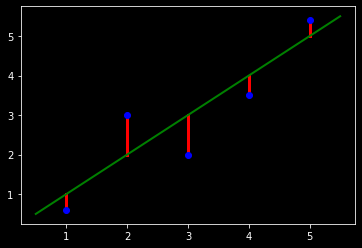

In [ ]:
x = [1, 2, 3, 4, 5]
y = [0.6, 3, 2, 3.5, 5.4]



En la figura anterior se muestran en rojo las distancias entre cada punto (en azul) y la recta (en verde). 

Podemos llamar las coordenadas de cada punto azul como ($x_i, y_i$).
Si evaluamos la ecuación de la recta ($y_i'=mx_i+b$) en cada valor $x_i$, obtenemos las coordenadas verticales de los puntos teóricos.
para obtener las distancias (líneas rojas) se hace simplemente la diferencia entre las dos alturas.
$$y'_i - y_i$$
Esta distancia da una medida del error entre el modelo (la línea) y los puntos. Para tener solo cantidades positivas se eleva al cuadrado:
$$(y'_i - y_i)^2$$
si se suman todos los cuadrados tendremos una medida del error total
$$\sum_{i=1}^{i=n}(y'_i - y_i)^2$$
Se desea que el valor del error sea el más pequeño posible por lo que se desea encontrar el valor mínimo de la ecuación anterior. 
Al tratarse de una función cuadrática positiva, el mínimo se puede hallar simplemente derivando respecto a $m$ e igualando a cero y repitiendo el proceso para $b$:

$$\frac{\partial \sum(y'_i - y_i)^2}{\partial m}=0$$
$$\frac{\partial \sum(y'_i - y_i)^2}{\partial b}=0$$
Sustituyendo a $y_i'$
$$\frac{\partial \sum(mx_i+b - y_i)^2}{\partial m}=0$$
$$\frac{\partial \sum(mx_i+b - y_i)^{2}}{\partial b}=0$$
Con esto se obtiene
$$\sum_{i=1}^{n} y_i = nb+ m\sum_{i=1}^n x_i$$
$$\sum_{i=1}^{n} x_iy_i = b\sum_{i=1}^{n}+ m\sum_{i=1}^n x_i^2$$
Resolviendo para $m$ y $b$ se tiene
$$m = \frac{\sum x_iy_i-\frac{1}{n}\sum x_i \sum y_i}{\sum x_i^2 - \frac{1}{n}\left(\sum x_i\right)^2}$$

$$b = \frac{1}{n}\sum y_i - \frac{m}{n}\sum x_i$$

A continuación, se muestra un ejemplo de implementación de estas ecuaciones:

## Ajuste lineal (método matricial)


Supongamos que tenemos un sistema inconsistente de ecuaciones que no cumplen

$$\textbf{P}\vec v = \vec y$$

o escrito de forma más explicita 

$$\begin{bmatrix}
1 && x_1\\ 
1 && x_2\\ 
\vdots && \vdots\\ 
1 && x_n
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
\end{bmatrix}=\begin{bmatrix}
y_1\\ 
y_2\\ 
\vdots \\ 
y_n
\end{bmatrix}$$

de forma que $\vec y$ no se encuentra en el espacio columna de $\textbf{P}$. Sin embargo, la proyección del vector $\vec y$ sobre el espacio columna de $\textbf{P}$ se corresponde con la menor distancia entre dicho espacio y $\vec y$. Entonces para minimizar esta distancia
$$\left \| \vec y - \textbf{P}\vec v^{*} \right \|$$
se tiene que $$\textbf{P}\vec v^{*} = \text{Proy}_{C(\textbf{P})}\vec y$$ 
al restar $\vec y$ a cada lado de la igualdad obtenemos un vector que es ortogonal al espacio columna de $\textbf{P}$ 

$$\textbf{P}\vec v^{*}-\vec y = \text{Proy}_{C(\textbf{P})}\vec y - \vec y$$ 
Es decir $\textbf{P}\vec v^{*}-\vec y \in C(P)^{\perp}$.
Teniendo en cuenta que este espacio ortogonal es el espacio izquierdo nulo de $\textbf{P}^{\perp}$, que se nota como $N(\textbf P^{\intercal})$
$$C(P)^{\perp} = N(\textbf P^{\intercal})$$
Entonces
$$\textbf{P}\vec v^{*}-\vec y \in N(\textbf P^{\intercal})$$
Al estar $\textbf{P}\vec v^{*}-\vec y$ en $N(\textbf P^{\intercal})$ significa que si se multiplica por izquierda por $\textbf P^{\intercal}$ nos dará como resultado el vector cero.
$$\textbf P^{\intercal}(\textbf{P}\vec v^{*}-\vec y)=\vec 0$$
Distribuyendo
$$\textbf P^{\intercal}\textbf{P}\vec v^{*}-\textbf P^{\intercal}\vec y=\vec 0$$
Sumando $\textbf P^{\intercal}\vec y$ en ambos extremos de la igualdad
$$\textbf P^{\intercal}\textbf{P}\vec v^{*}=\textbf P^{\intercal}\vec y$$
Multiplicando ambos extremos por izquierda por $(\textbf P^{\intercal}\textbf{P})^{-1}$ y simplificando se tiene
$$\vec v^{*}=(\textbf P^{\intercal}\textbf{P})^{-1}\textbf P^{\intercal}\vec y$$
Así hemos encontrado los parámetros que minimizan la distancia $\left \| \vec y - \textbf{P}\vec v^{*} \right \|$, los componentes de $\vec v^*$ son coeficientes del ajuste buscado.

Veamos un ejemplo en un espacio de 2 dimensiones en Python:

## Solución de sistemas de ecuaciones lineales por eliminación gaussiana

El algoritmo es el siguiente:
- Ir a la primera columna número cero de izquierda a derecha.
- Si la primera fila tiene un cero en esta columna, intercambiarlo con otra que no lo tenga.
- Luego, obtener ceros debajo de este elemento delantero, sumando múltiplos adecuados del renglón superior a los renglones debajo de él.
- Cubrir el renglón superior y repetir el proceso anterior con la submatriz restante. Repetir con el resto de los renglones (en este punto la matriz se encuentra en forma escalonada).
- Comenzando con el último renglón no cero, avanzar hacia arriba: para cada renglón obtener 1 delantero e introducir ceros arriba de este sumando múltiplos correspondientes a los renglones correspondientes.

**Ejemplo:** Resolver el siguiente sistema de ecuaciones

El sistema de 3 ecuaciones con 3 incognitas

$$      \begin{array}{rrrcr}
          2x & + y &   -z & = &   8 \\
         -3x & - y & + 2z & = & -11 \\
         -2x & + y & + 2z & = &  -3
      \end{array}$$

se puede representar con la siguiente matriz aumentada:

$$   \left (
      \begin{array}{rrr:r}
          2 &  1 & -1 &   8 \\
         -3 & -1 &  2 & -11 \\
         -2 &  1 &  2 &  -3
      \end{array}
   \right )$$

A modo de ejemplo, se muestra un paso del algoritmo de eliminación gaussiana: Sumando a la segunda fila, la primera multiplicada por $\frac{3}{2}$, y a la tercera, la primera fila:
$$   \left (
      \begin{array}{rrr:r}
         2 & 1           & -1          & 8 \\
         0 & \frac{1}{2} & \frac{1}{2} & 1 \\
         0 & 2           & 1           & 5 
      \end{array}
   \right )$$

In [1]:
A = np.array([
    [2, 1, -1, 8],
    [-3, -1, 2, -11],
    [-2, 1, 2, -3]
])


NameError: name 'np' is not defined

## Eliminación gaussiana con pivoteo parcial

Si aparecen ceros a lo largo de la diagonal de la matriz que representa el sistema de ecuaciónes el método anteriormente expuesto fallará, una forma versión más robusta del algoritmo es la eliminación gaussiana con pivoteo parcial, el cual realizan intercambios de filas en la matriz de forma tal que en la diagonal quede el elemento más grande en valor absoluto, comparado con los demas elementos de la columna a la que pertenece cada elemento diagonal.

**Ejemplo:** Resolver el siguiente sistema de ecuaciones:

$$      \begin{array}{rrrcr}
           & - 2y &   -z & = &   -14 \\
         2x & + 3y & + z & = & 1 \\
         3x & + y & - z & = & 1
      \end{array}$$

se puede representar con la siguiente matriz aumentada:

$$   \left (
      \begin{array}{rrr:r}
          0 & -2 & -1 & -14 \\
          2 &  3 &  1 &   1 \\
          3 &  1 & -1 &   1
      \end{array}
   \right )$$

In [2]:
A = np.array([
              [0, -2, -1, -14],
              [2, 3, 1, 1],
              [3, 1, -1, 1]
])


NameError: name 'np' is not defined